# Chapter 2. Statistical Learning

## Exercise 9

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.1f}'.format
import seaborn as sns
plt.style.use('notebook')
%matplotlib notebook

In [2]:
filename = '../data/auto.csv'
auto_df = pd.read_csv(filename, na_values='?', index_col=-1)
auto_df.dropna(inplace=True)

In [3]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [4]:
auto_df.shape

(392, 8)

In [5]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
dtypes: float64(4), int64(4)
memory usage: 27.6+ KB


In [6]:
auto_df.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
year             13
origin            3
dtype: int64

In [7]:
auto_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.0,392.0,392.0,392.0,392.0,392.0,392.0,392.0
mean,23.4,5.5,194.4,104.5,"2,977.6",15.5,76.0,1.6
std,7.8,1.7,104.6,38.5,849.4,2.8,3.7,0.8
min,9.0,3.0,68.0,46.0,"1,613.0",8.0,70.0,1.0
25%,17.0,4.0,105.0,75.0,"2,225.2",13.8,73.0,1.0
50%,22.8,4.0,151.0,93.5,"2,803.5",15.5,76.0,1.0
75%,29.0,8.0,275.8,126.0,"3,614.8",17.0,79.0,2.0
max,46.6,8.0,455.0,230.0,"5,140.0",24.8,82.0,3.0


In [19]:
for name in auto_df.columns:
    print(f"{name.title():s}: Min: {auto_df[name].min():} - Max: {auto_df[name].max():}")

Mpg: Min: 9.0 - Max: 46.6
Cylinders: Min: 3 - Max: 8
Displacement: Min: 68.0 - Max: 455.0
Horsepower: Min: 46.0 - Max: 230.0
Weight: Min: 1613 - Max: 5140
Acceleration: Min: 8.0 - Max: 24.8
Year: Min: 70 - Max: 82
Origin: Min: 1 - Max: 3


In [24]:
for name in auto_df.columns:
    perc_err = 100*auto_df[name].sem()/auto_df[name].mean()
    print(f"{name.title():s}: {auto_df[name].mean():.2f} +/- {auto_df[name].sem():.2f} ({perc_err:.2f}%)")

Mpg: 23.45 +/- 0.39 (1.68%)
Cylinders: 5.47 +/- 0.09 (1.57%)
Displacement: 194.41 +/- 5.29 (2.72%)
Horsepower: 104.47 +/- 1.94 (1.86%)
Weight: 2977.58 +/- 42.90 (1.44%)
Acceleration: 15.54 +/- 0.14 (0.90%)
Year: 75.98 +/- 0.19 (0.24%)
Origin: 1.58 +/- 0.04 (2.58%)


In [10]:
auto_df_10_86 = auto_df.iloc[10:86, :]

In [11]:
auto_df_10_86.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, dodge challenger se to amc matador
Data columns (total 8 columns):
mpg             76 non-null float64
cylinders       76 non-null int64
displacement    76 non-null float64
horsepower      76 non-null float64
weight          76 non-null int64
acceleration    76 non-null float64
year            76 non-null int64
origin          76 non-null int64
dtypes: float64(4), int64(4)
memory usage: 5.3+ KB


In [12]:
auto_df_10_86.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0
mean,19.4,5.9,223.1,119.5,"3,148.3",14.8,71.2,1.5
std,6.1,1.9,118.1,44.8,977.9,2.8,0.8,0.7
min,9.0,3.0,70.0,46.0,"1,613.0",8.0,70.0,1.0
25%,14.0,4.0,112.2,87.8,"2,261.5",13.0,70.8,1.0
50%,19.0,6.0,212.5,98.5,"2,947.5",14.5,71.0,1.0
75%,25.0,8.0,323.5,153.5,"4,107.2",16.1,72.0,2.0
max,35.0,8.0,455.0,225.0,"5,140.0",23.5,73.0,3.0


In [25]:
df = auto_df_10_86
for name in df.columns:
    print(f"{name.title():s}: {df[name].mean():.2f} +/- {df[name].sem():.2f}")

Mpg: 19.45 +/- 0.71
Cylinders: 5.88 +/- 0.21
Displacement: 223.10 +/- 13.55
Horsepower: 119.53 +/- 5.14
Weight: 3148.26 +/- 112.18
Acceleration: 14.81 +/- 0.33
Year: 71.17 +/- 0.10
Origin: 1.47 +/- 0.08


In [29]:
df = auto_df
for name in df.columns:
    perc_err = 100*df[name].sem()/df[name].mean()
    print(f"{name.title():s}: {df[name].mean():.2f} +/- {df[name].sem():.2f}, ({perc_err:.2f}%)")

Mpg: 23.45 +/- 0.39, (1.68%)
Cylinders: 5.47 +/- 0.09, (1.57%)
Displacement: 194.41 +/- 5.29, (2.72%)
Horsepower: 104.47 +/- 1.94, (1.86%)
Weight: 2977.58 +/- 42.90, (1.44%)
Acceleration: 15.54 +/- 0.14, (0.90%)
Year: 75.98 +/- 0.19, (0.24%)
Origin: 1.58 +/- 0.04, (2.58%)


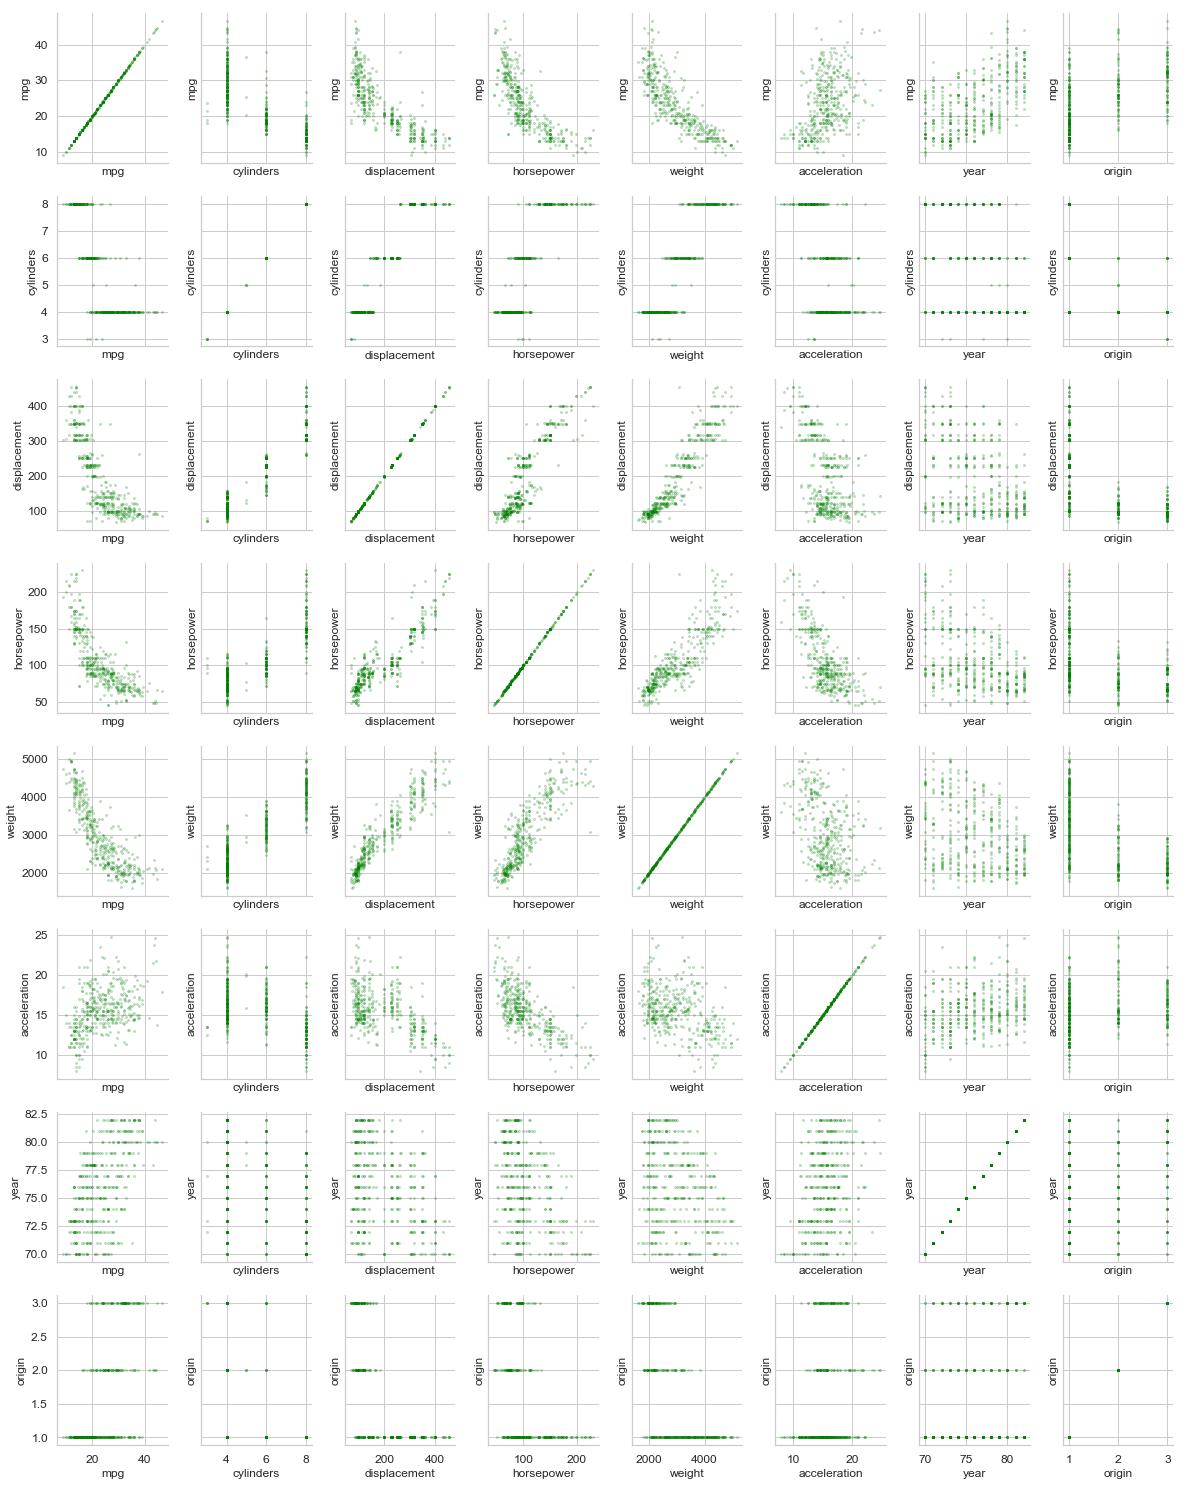

In [15]:
sns.set(style="whitegrid", color_codes=True)
df = auto_df
g = sns.PairGrid(df.iloc[:, 0:10], height=2.6, aspect=0.8)
g = g.map(plt.scatter, s=4, color='green', alpha=0.2)
xlabels, ylabels = [], []
label_font_size = 12

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j, i].xaxis.set_label_text(xlabels[i])
        g.axes[j, i].xaxis.label.set_size(label_font_size)
        g.axes[j, i].tick_params(axis='x', which='major', labelsize=label_font_size)
        g.axes[j, i].yaxis.set_label_text(ylabels[j])
        g.axes[j, i].yaxis.label.set_size(label_font_size)
        g.axes[j, i].tick_params(axis='y', which='major', labelsize=label_font_size)

plt.tight_layout();